# **Feature extraction from RGB Image**

## **(1). Importing The Required Libraries**

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment
import warnings
warnings.filterwarnings('ignore')

## **(2). Importing the RGB Image**

In [2]:
# Open an image file
image_path = "/content/drive/MyDrive/benign_lesions/1.jpg"
try:
    img = Image.open(image_path)
    # Do something with the image, such as display it or process it further
    img.show()  # Display the image using the default image viewer
except FileNotFoundError:
    print("File not found. Please check the path to your image.")
except Exception as e:
    print("An error occurred:", e)
    exit()

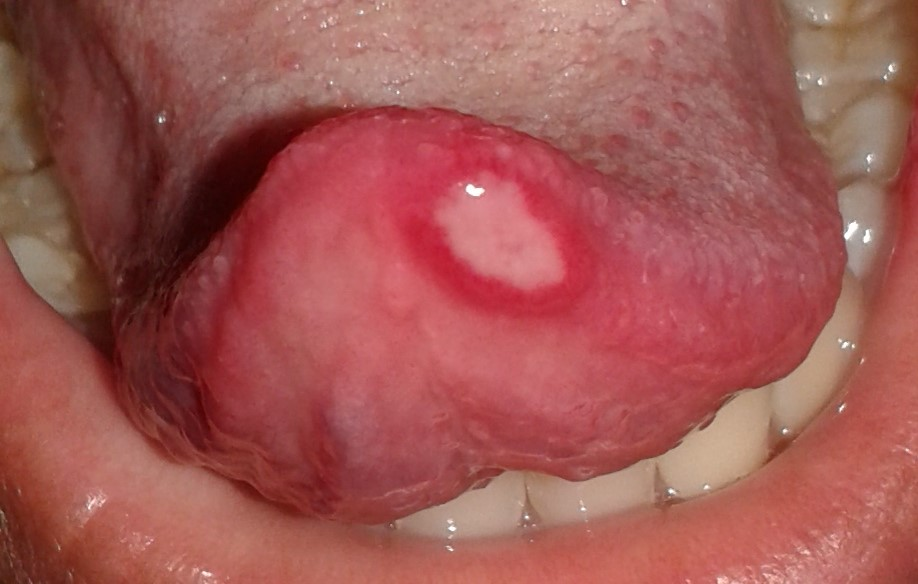

In [3]:
img

## **(3). Convert image to numpy array**

array([[[ 83,  38,  32],
        [ 83,  38,  32],
        [ 85,  42,  35],
        ...,
        [114,  60,  34],
        [115,  59,  34],
        [113,  57,  32]],

       [[ 82,  37,  31],
        [ 80,  37,  30],
        [ 81,  38,  31],
        ...,
        [115,  61,  35],
        [115,  59,  34],
        [114,  58,  33]],

       [[ 79,  36,  29],
        [ 76,  33,  26],
        [ 75,  32,  23],
        ...,
        [114,  60,  34],
        [115,  59,  34],
        [114,  58,  33]],

       ...,

       [[ 71,  29,  15],
        [ 70,  28,  14],
        [ 73,  30,  14],
        ...,
        [129,  55,  46],
        [130,  56,  47],
        [129,  55,  46]],

       [[ 67,  28,  13],
        [ 67,  28,  13],
        [ 69,  27,  13],
        ...,
        [131,  57,  48],
        [130,  57,  48],
        [129,  56,  47]],

       [[ 68,  29,  14],
        [ 68,  29,  14],
        [ 69,  27,  13],
        ...,
        [132,  58,  49],
        [131,  58,  49],
        [130,  57,  48]]], dtype=uint8)
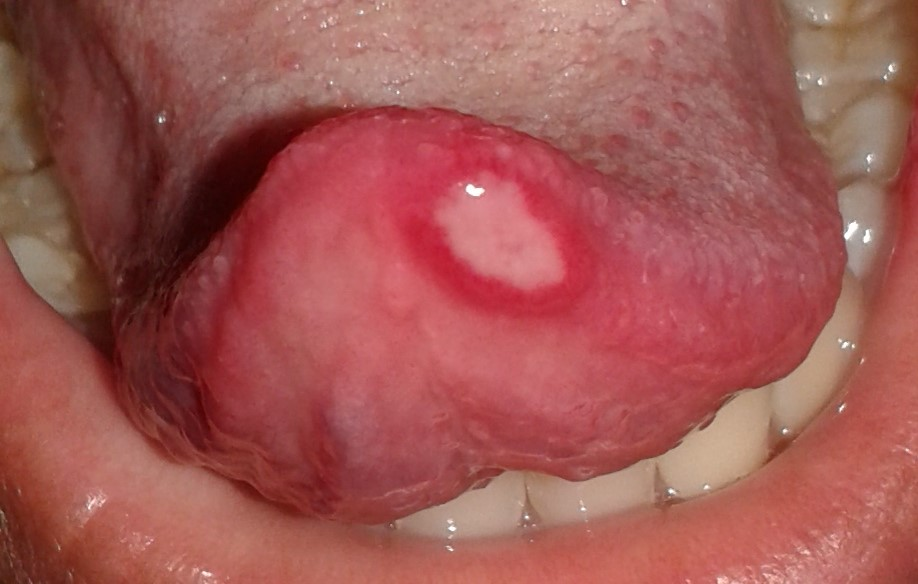

In [4]:
img_array = np.array(img)
img_array

## **(4). Histogram Plot for each RGB channel(Intensity Vs Frequency)**

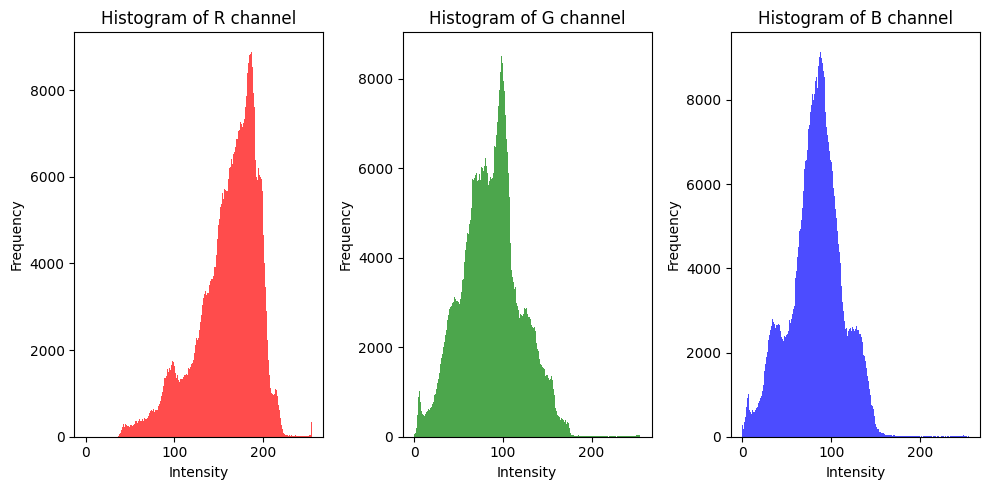

In [5]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))
for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    plt.hist(img_array[:,:,i].flatten(), bins=256, range=(0, 255), color=color, alpha=0.7)
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {color.upper()} channel')
plt.tight_layout()
plt.show()


## **(5).  Histogram Plot for each RGB channel(Intensity Vs Probability)**

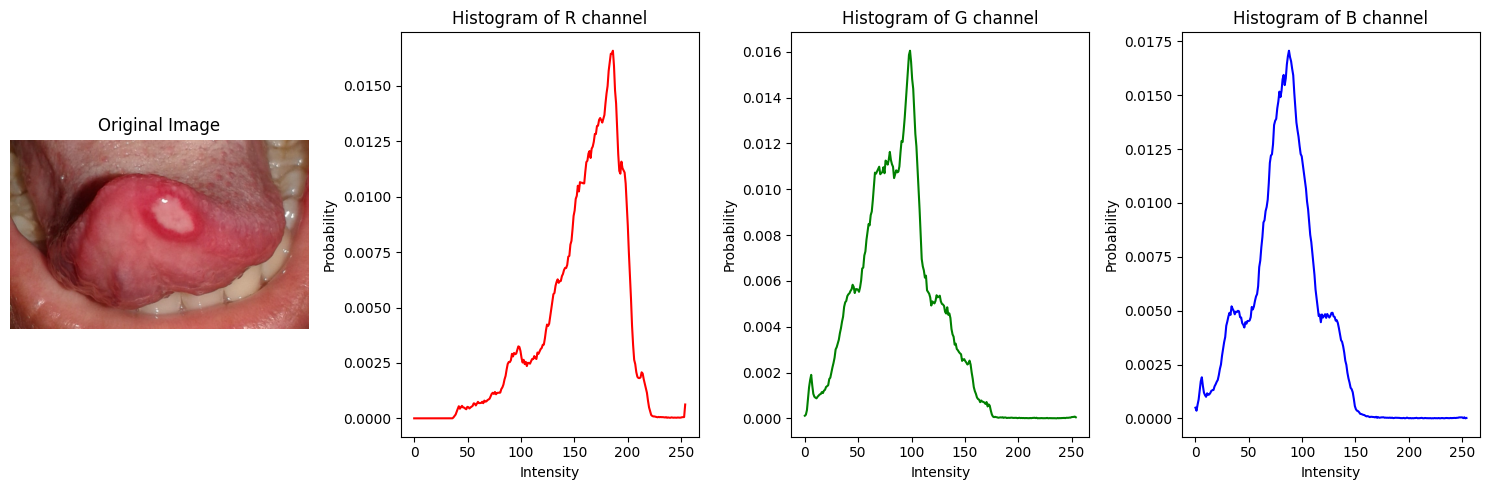

In [6]:
image_path = "/content/drive/MyDrive/benign_lesions/1.jpg"
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print("File not found. Please check the path to your image.")
    exit()
except Exception as e:
    print("An error occurred:", e)
    exit()

# Convert image to numpy array
img_array = np.array(img)

# Plot histogram for each RGB channel
colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i, color in enumerate(colors):
    plt.subplot(1, 4, i+2)
    # Calculate the histogram
    hist, bins = np.histogram(img_array[:,:,i].flatten(), bins=256, range=(0, 255), density=True)
    # Normalize the histogram
    hist = hist / hist.sum()
    # Plot the histogram
    plt.plot(bins[:-1], hist, color=color)
    plt.xlabel('Intensity')
    plt.ylabel('Probability')
    plt.title(f'Histogram of {color.upper()} channel')
plt.tight_layout()
plt.show()


## **(6).  Histogram Plot for each RGB channel(Intensity Vs Probability)**

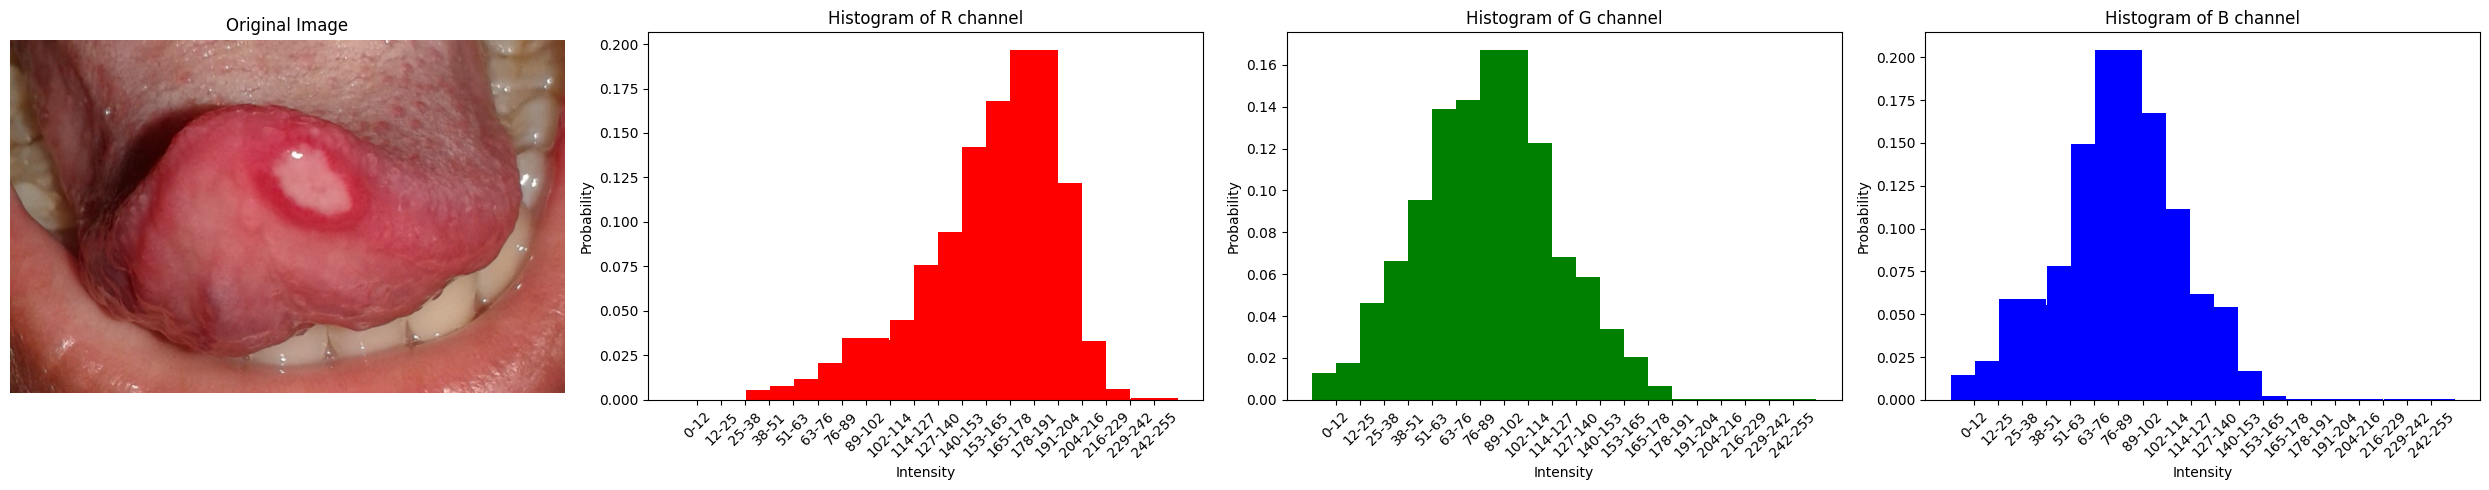

In [2]:
# Open the image
image_path = "/content/drive/MyDrive/benign_lesions/1.jpg"
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print("File not found. Please check the path to your image.")
    exit()
except Exception as e:
    print("An error occurred:", e)
    exit()

# Convert image to numpy array
img_array = np.array(img)

# Plot histogram for each RGB channel
colors = ('r', 'g', 'b')
plt.figure(figsize=(25, 5))

# Display the original image
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i, color in enumerate(colors):
    plt.subplot(1, 4, i+2)
    # Calculate the histogram
    hist, bins = np.histogram(img_array[:,:,i].flatten(), bins=20, range=(0, 255), density=True)
    # Normalize the histogram
    hist = hist / hist.sum()
    # Plot the histogram
    plt.bar(bins[:-1], hist, color=color, width=25)
    plt.xlabel('Intensity')
    plt.ylabel('Probability')
    plt.title(f'Histogram of {color.upper()} channel')

    # Set x-axis labels to display bin intervals
    bin_width = (255 - 0) / 20
    bin_intervals = [f'{int(bins[j])}-{int(bins[j]+bin_width)}' for j in range(len(bins) - 1)]
    plt.xticks(bins[:-1], bin_intervals, rotation=45)

plt.tight_layout()
plt.show()


## **(7). Feature Extraction from Uniform Distributiont**

Channel R - Statistics for each bin:
Bin	Mean	SD	Skewness	Kurtosis
1	nan	nan	nan	nan
2	nan	nan	nan	nan
3	37.68	0.49	-0.13	0.17
4	44.95	3.18	-1.12	197.07
5	57.49	3.66	-8.46	335.83
6	70.65	3.74	-12.40	359.47
7	84.11	3.74	-20.54	375.86
8	95.65	3.39	-2.69	238.44
9	108.11	3.78	-2.28	359.14
10	121.55	3.74	-9.81	352.71
11	134.34	3.67	-4.78	334.26
12	146.95	3.47	-6.98	260.84
13	159.20	3.76	-3.36	353.93
14	172.16	3.72	-2.64	343.79
15	185.01	3.62	-0.82	320.10
16	197.00	3.30	5.14	226.24
17	208.76	3.91	24.14	425.62
18	219.34	2.50	25.51	225.94
19	235.23	3.72	15.39	370.69
20	249.16	3.61	-11.50	295.62
Channel G - Statistics for each bin:
Bin	Mean	SD	Skewness	Kurtosis
1	6.80	2.90	3.31	158.60
2	19.80	3.76	-13.65	366.14
3	32.91	3.66	-14.07	340.59
4	44.58	3.42	-0.97	247.73
5	57.59	3.68	-9.71	341.76
6	70.10	3.71	-0.87	342.55
7	82.94	3.75	1.71	351.32
8	95.85	3.40	-5.79	244.71
9	106.90	3.66	19.12	357.26
10	120.96	3.79	0.34	361.54
11	133.63	3.67	5.27	334.53
12	146.18	3.45	4.91	255.25
13	157.46	3.45	23.64	324

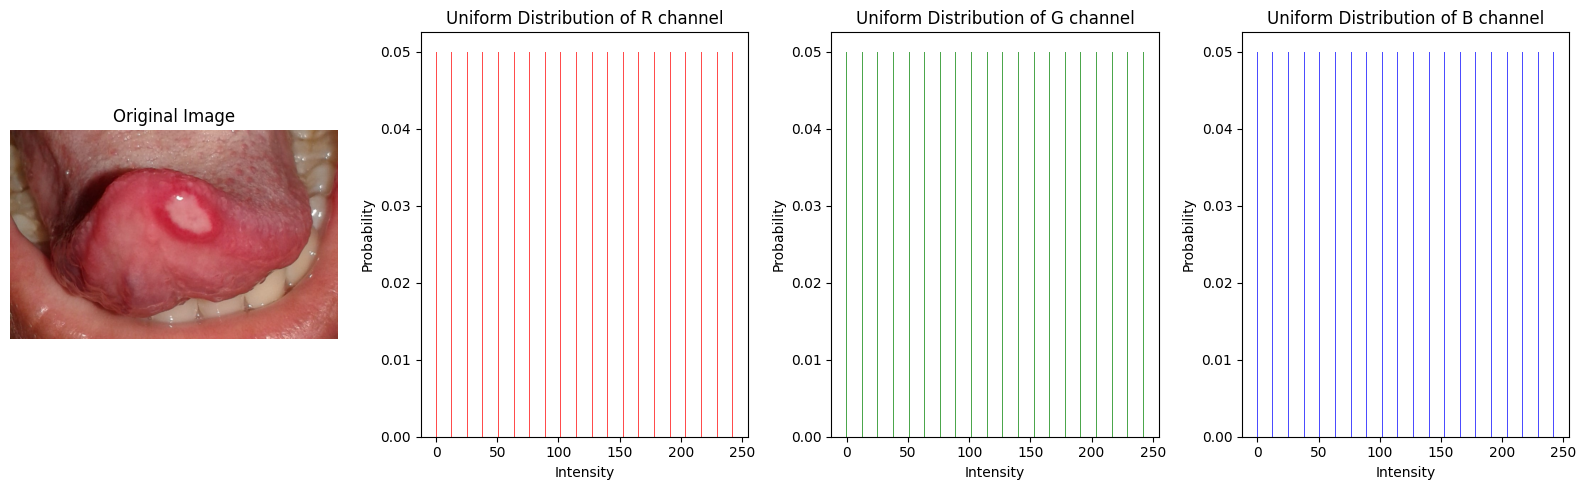

In [2]:
# Open the image
image_path = "/content/drive/MyDrive/benign_lesions/1.jpg"
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print("File not found. Please check the path to your image.")
    exit()
except Exception as e:
    print("An error occurred:", e)
    exit()

# Convert image to numpy array
img_array = np.array(img)

# Plot histogram for each RGB channel
colors = ('r', 'g', 'b')
plt.figure(figsize=(20, 5))

# Display the original image
plt.subplot(1, 5, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Calculate histogram with 20 bins for all channels
num_bins = 20

for i, color in enumerate(colors):
    plt.subplot(1, 5, i+2)
    # Calculate the histogram
    hist, bins = np.histogram(img_array[:,:,i].flatten(), bins=num_bins, range=(0, 255))
    # Normalize the histogram to have equal probabilities
    equal_prob = np.ones_like(hist) / len(hist)
    # Plot the equal probability distribution with corresponding color
    plt.bar(bins[:-1], equal_prob, color=color, alpha=0.7)
    plt.xlabel('Intensity')
    plt.ylabel('Probability')
    plt.title(f'Uniform Distribution of {color.upper()} channel')

    # Calculate mean, SD, skewness, and kurtosis for each bin
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_stats = np.zeros((len(hist), 4))
    for j in range(len(hist)):
        bin_data = img_array[:,:,i][(img_array[:,:,i] >= bins[j]) & (img_array[:,:,i] < bins[j+1])].flatten()
        bin_stats[j, 0] = np.mean(bin_data)
        bin_stats[j, 1] = np.std(bin_data)
        bin_stats[j, 2] = moment(bin_data, moment=3)
        bin_stats[j, 3] = moment(bin_data, moment=4)

    print(f"Channel {color.upper()} - Statistics for each bin:")
    print("Bin\tMean\tSD\tSkewness\tKurtosis")
    for j in range(len(hist)):
        print(f"{j+1}\t{bin_stats[j,0]:.2f}\t{bin_stats[j,1]:.2f}\t{bin_stats[j,2]:.2f}\t{bin_stats[j,3]:.2f}")

plt.tight_layout()
plt.show()


## **(8)  Feature Extraction from Non-Uniform Distribution**

Channel R - Statistics for each bin:
Bin	Mean	SD	Skewness	Kurtosis
1	42.80	2.31	-4.77	65.72
2	52.40	3.23	-5.34	190.71
3	63.19	3.14	-1.78	172.53
4	74.33	3.08	-3.57	167.55
5	85.89	3.06	-10.91	174.84
6	96.10	3.11	-1.69	168.69
7	107.05	3.20	-0.52	182.63
8	118.27	3.18	-3.39	181.98
9	129.47	3.15	-6.06	179.01
10	140.16	3.17	-2.08	181.08
11	151.37	3.11	-4.39	172.67
12	162.16	3.16	-2.21	177.93
13	173.09	3.14	-1.12	175.45
14	184.13	3.10	-1.88	168.60
15	194.72	3.18	2.45	181.00
16	204.33	2.93	18.30	181.99
17	215.76	2.68	7.88	116.19
18	226.97	3.25	13.74	207.68
19	238.52	3.22	5.77	186.49
20	250.11	2.96	-7.42	136.16
Channel G - Statistics for each bin:
Bin	Mean	SD	Skewness	Kurtosis
1	6.80	2.90	3.31	158.60
2	19.80	3.76	-13.65	366.14
3	32.91	3.66	-14.07	340.59
4	44.58	3.42	-0.97	247.73
5	57.59	3.68	-9.71	341.76
6	70.10	3.71	-0.87	342.55
7	82.94	3.75	1.71	351.32
8	95.85	3.40	-5.79	244.71
9	106.90	3.66	19.12	357.26
10	120.96	3.79	0.34	361.54
11	133.63	3.67	5.27	334.53
12	146.18	3.45	4.91	255.25
13	157.46

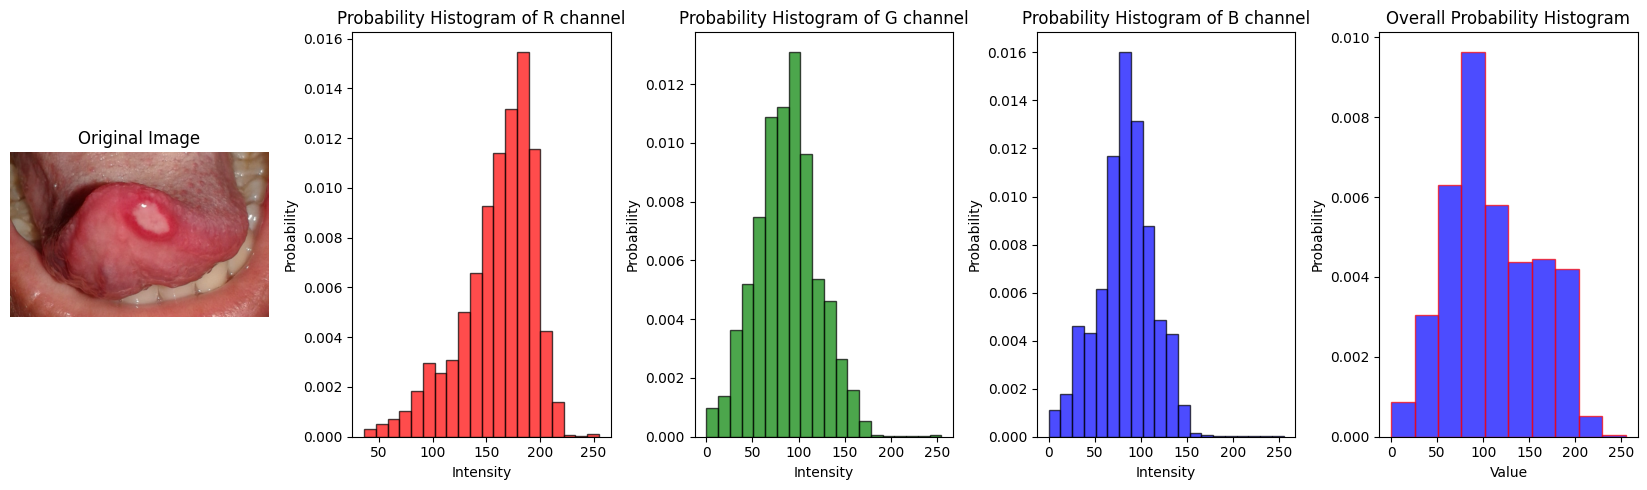

In [1]:
# Open the image
image_path = "/content/drive/MyDrive/benign_lesions/1.jpg"
    img = Image.open(image_path)
except FileNotFoundError:
    print("File not found. Please check the path to your image.")
    exit()
except Exception as e:
    print("An error occurred:", e)
    exit()

# Convert image to numpy array
img_array = np.array(img)

# Plot histogram for each RGB channel
colors = ('r', 'g', 'b')
plt.figure(figsize=(20, 5))

# Display the original image
plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Calculate histogram with 20 bins for all channels
num_bins = 20

for i, color in enumerate(colors):
    plt.subplot(1, 6, i+2)
    # Calculate the histogram
    hist, bins, _ = plt.hist(img_array[:,:,i].flatten(), bins=num_bins, color=color, alpha=0.7, edgecolor='black', density=True)
    plt.xlabel('Intensity')
    plt.ylabel('Probability')
    plt.title(f'Probability Histogram of {color.upper()} channel')

    # Calculate mean, SD, skewness, and kurtosis for each bin
    bin_stats = np.zeros((len(hist), 4))
    for j in range(len(hist)):
        bin_data = img_array[:,:,i][(img_array[:,:,i] >= bins[j]) & (img_array[:,:,i] < bins[j+1])].flatten()
        bin_stats[j, 0] = np.mean(bin_data)
        bin_stats[j, 1] = np.std(bin_data)
        bin_stats[j, 2] = moment(bin_data, moment=3)
        bin_stats[j, 3] = moment(bin_data, moment=4)

    print(f"Channel {color.upper()} - Statistics for each bin:")
    print("Bin\tMean\tSD\tSkewness\tKurtosis")
    for j in range(len(hist)):
        print(f"{j+1}\t{bin_stats[j,0]:.2f}\t{bin_stats[j,1]:.2f}\t{bin_stats[j,2]:.2f}\t{bin_stats[j,3]:.2f}")

# Flatten the image array for overall histogram and feature extraction
data = np.ravel(img_array)

# Create overall histogram
plt.subplot(1, 6, 5)
counts, bins, _ = plt.hist(data, bins=10, color='blue', alpha=0.7, edgecolor='red', density=True)
plt.title('Overall Probability Histogram')
plt.xlabel('Value')
plt.ylabel('Probability')

# Separate each bin and perform feature extraction
for i in range(len(bins) - 1):
    bin_start = bins[i]
    bin_end = bins[i + 1]
    bin_values = data[(data >= bin_start) & (data < bin_end)]

    # Perform feature extraction on bin_values
    bin_mean = np.mean(bin_values)
    bin_std = np.std(bin_values)
    bin_median = np.median(bin_values)
    skewness = np.mean((bin_values - bin_mean) ** 3) / (bin_std ** 3)
    kurtosis = np.mean((bin_values - bin_mean) ** 4) / (bin_std ** 4) - 3

    # Example feature extraction: print mean, std, median, skewness, and kurtosis of each bin
    print(f"Bin {i+1}: Mean={bin_mean}, Std={bin_std}, Median={bin_median}, Skew={skewness}, Kurt={kurtosis}")

plt.tight_layout()
plt.show()


# *************************************************************************

# About Me:-
## Name - Aatish Kumar Baitha
  - M.Tech(Data Science)
- YouTube
  - https://www.youtube.com/@EngineeringWithAatish/playlists
- My Linkedin Profile
  - https://www.linkedin.com/in/aatish-kumar-baitha-ba9523191
- My Blog
  - https://computersciencedatascience.blogspot.com/
- My Github Profile
  - https://github.com/Aatishkb

# Thank you!

# *************************************************************************